# Importing Libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import pandas as pd

mpl.rcParams['figure.dpi'] = 100

# Functions
Resampling the time series to calculate the mean and standard deviation

In [15]:
def resample_time_series(time_series, length_of_sample, num_samples):
    """
    Resample a time series and calculate the mean and standard deviation of the resampled data.

    Args:
    time_series (np.array): The time series to be resampled. (1D numpy array)
    length_of_sample (int): The length of the sample to be drawn.
    num_samples (int): The number of samples to be drawn.

    Returns:
    tuple: A tuple containing the means and standard deviations of the resampled data.
    """
    if length_of_sample > len(time_series):
        raise ValueError("Sample length cannot be greater than the length of the time series.")

    means = np.empty(num_samples)
    std_devs = np.empty(num_samples)

    for i in np.arange(num_samples):
        sample_indices = np.random.randint(0, len(time_series), size=length_of_sample)
        sample = time_series[sample_indices]
        means[i] = np.nanmean(sample)
        std_devs[i] = np.nanstd(sample)
    return means, std_devs

In [16]:
series_length = 5000
np.random.seed(0)


0.0 1.0
0.25 0.9682458365518543
0.5 0.8660254037844386
0.92 0.39191835884530846


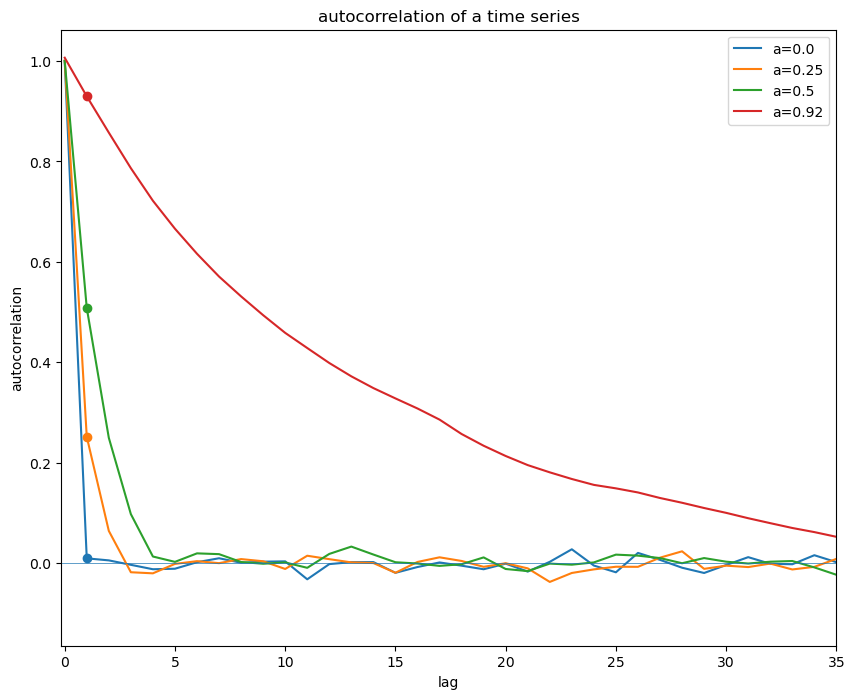

In [17]:
# Generate a time series with red noise
auto_vec = np.array([0 , .25, .5, .92])
T = np.empty((len(auto_vec), series_length))
plt.figure(figsize=(10, 8))
for ia, a in enumerate(auto_vec):
    # Create time series with red noise itteratively
    b = np.sqrt(1. - a**2) # Calculate the value of b for the given a
    print(a, b)
    x1 = [] # Create an empty list to store the time series
    x1.append(np.random.normal(.0, 1., size=1,)) # Generate the first value of the time series
    for it in np.arange(0, series_length-1, 1): # Generate the time series
        x1.append(a*x1[it] + b*np.random.normal(size=1))
    x1 = np.asarray(x1)[:,0] # Convert the list to a numpy array and remove the second dimension of the array
    T[ia, :] = x1 # Store the time series in the matrix T
    
    # correlate x1 with itself to calculate the autocorrelation
    # note, can also use np.corrcoef()
    c = np.correlate(x1,x1, 'same')/(np.var(x1)*np.size(x1)) 
    c = c[int(np.size(c)/2):]    
    
    p=plt.plot(np.arange(0,np.size(c)),c,'-', label='a=' + str(a))
    clrVal = p[0].get_color()
    plt.plot(1,c[1],'o',color=clrVal)
    
plt.axhline(y=0,linewidth=.5)  
plt.xlim(-.15,35)
plt.xlabel('lag')
plt.ylabel('autocorrelation') 
plt.legend()
#plt.legend(np.ndarray.tolist(auto_vec))
plt.title('autocorrelation of a time series')
plt.show()


In [ ]:
CORR_VEC = np.empty((10000,np.size(auto_vec)))

for ia,a in enumerate(auto_vec):

    print('running code for a = ' + str(a))
    b = np.sqrt(1. - a**2)
    
    for ic,cval in enumerate(CORR_VEC[:,0]):
        
        x = []
        y = []
        x.append(np.random.normal(size=1))
        y.append(np.random.normal(size=1))        
        
        #make two 100-valued red noise time series with specific auto correlations; x and y are not related!
        for it in np.arange(0,100,1):
            x.append(a*x[it] + b*np.random.normal(size=1))
            y.append(a*y[it] + b*np.random.normal(size=1))
        
        x = np.asarray(x)[:,0]
        y = np.asarray(y)[:,0]            
        c = np.corrcoef(x,y)
        CORR_VEC[ic,ia] = c[0,1]

running code for a = 0.0


In [ ]:
# Plot the time series
fig, ax = plt.subplots(np.size(auto_vec), 1, figsize=(10, 6), sharex=True)
for ia, a in enumerate(auto_vec):
    ax[ia].plot(T[ia, :])
    ax[ia].set_title('a = ' + str(a))
plt.show()

In [ ]:
sample_length = 100
sampling_iter = 1000

In [ ]:
# Resample the time series using the function
T_mean = np.empty((len(auto_vec), sampling_iter))
T_std = np.empty((len(auto_vec), sampling_iter))
for j in np.arange(len(auto_vec)):
    T_mean[j, :], T_std[j, :] = resample_time_series(T[j, :], sample_length, sampling_iter)

In [ ]:
# draw a sample of size of consecutive values from the time series
T_mean_2 = np.empty((len(auto_vec), sampling_iter))
for i in np.arange(np.size(auto_vec)):
    for j, val in  enumerate(T_mean[i, :]):
        ir = stats.randint.rvs(0, len(T[i,:]-1), size = sample_length)
        T_mean_2[i,j] = np.nanmean(T[i,ir])

In [ ]:
# Plot the histogram of the sample mean and standard deviation for each value of a

for ia, a in enumerate(auto_vec):
    fig, ax = plt.subplots(2, 1, figsize=(10, 6))
    ax[0].hist(T_mean[ia, :], bins = 20, label=f'a = {a}', alpha=0.5)
    ax[0].set_title(f'Histogram of the sample mean lag a={a}')
    ax[1].hist(T_std[ia, :], bins = 20, label=f'a = {a}', alpha=0.5)
    ax[1].set_title(f'Histogram of the sample standard deviation a={a}')
    ax[0].set_xlim(-.5, 0.5)
    ax[1].set_xlim(0.5, 1.5)
    plt.show()


In [ ]:
# Calculate the autocorrelation of the time series

auto_corr = np.empty((len(auto_vec), 10))
for ia, a in enumerate(auto_vec):
    auto_corr[ia, :] = np.correlate(T[ia, :], T[ia, :], mode='full')[series_length-1:series_length+9]/np.var(T[ia, :])
    
print(auto_corr)

In [ ]:
test = np.correlate(T[0, :], T[0, :], mode='full')  
print(test)
plt.plot(test)

In [ ]:
# Calcluate N* for these time series
